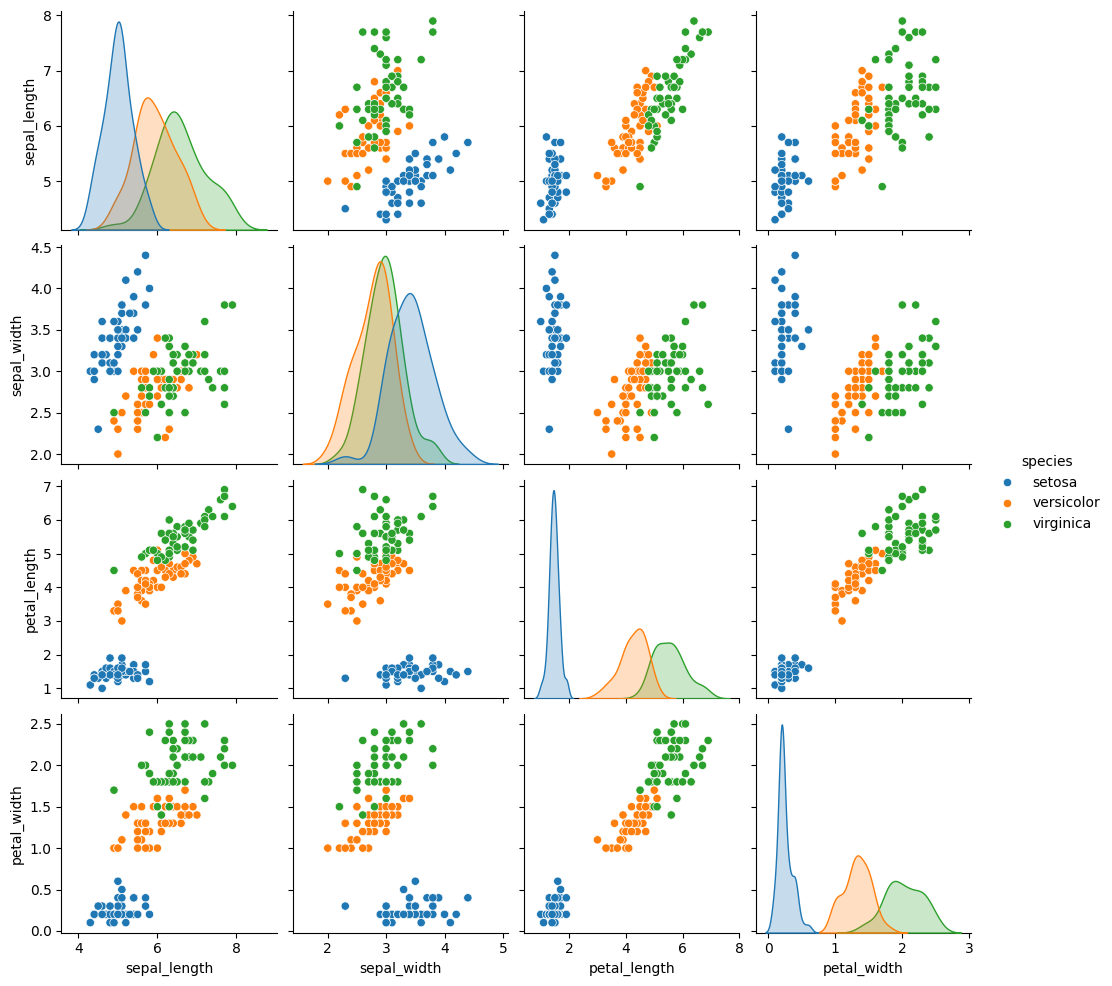

SSE for K=3: 139.82049635974974


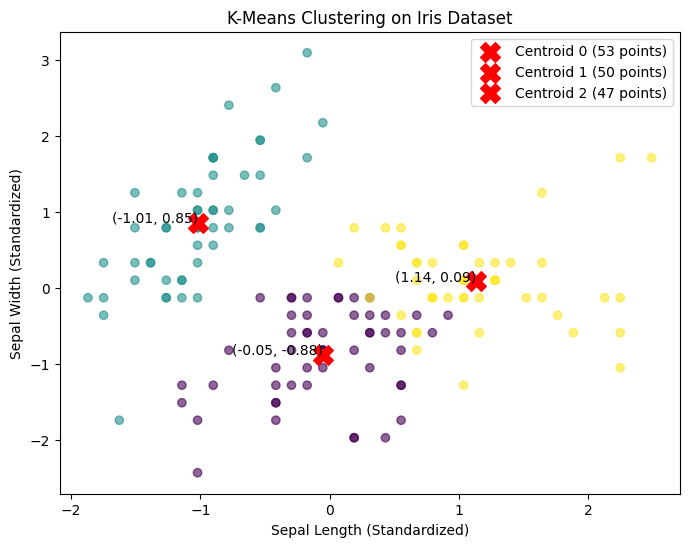

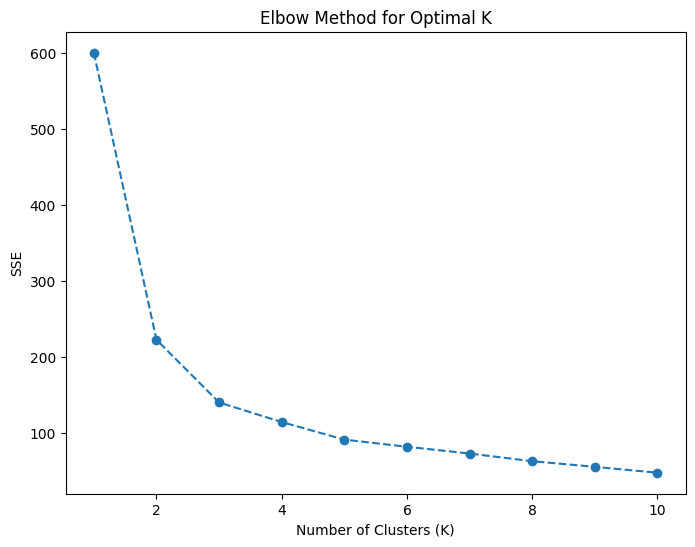

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
X = iris.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

sns.pairplot(sns.load_dataset("iris"), hue="species")
plt.show()

k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(X_scaled)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

sse = kmeans.inertia_
print(f"SSE for K={k}: {sse}")

unique, counts = np.unique(labels, return_counts=True)
cluster_counts = dict(zip(unique, counts))

plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', alpha=0.6)

for i, (cx, cy) in enumerate(centroids[:, :2]):
    plt.scatter(cx, cy, c='red', marker='X', s=200, label=f'Centroid {i} ({cluster_counts[i]} points)')
    plt.text(cx, cy, f'({cx:.2f}, {cy:.2f})', fontsize=10, ha='right', color='black')

plt.xlabel("Sepal Length (Standardized)")
plt.ylabel("Sepal Width (Standardized)")
plt.title("K-Means Clustering on Iris Dataset")
plt.legend()
plt.show()

sse_values = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    sse_values.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, sse_values, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("SSE")
plt.title("Elbow Method for Optimal K")
plt.show()


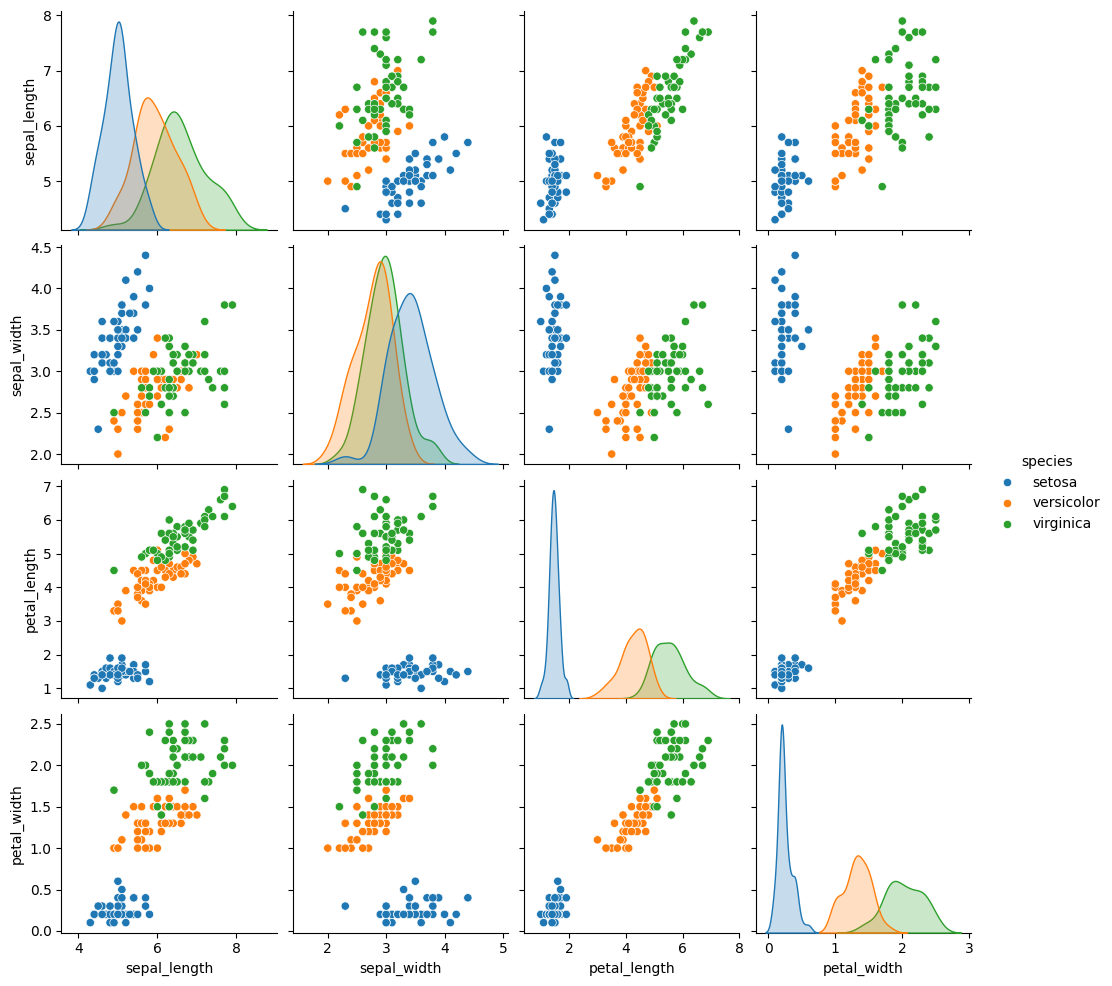

SSE for K=3: 139.82049635974974
SSE for Centroid 0: 44.38343410725925
SSE for Centroid 1: 47.668410508964406
SSE for Centroid 2: 47.76865174352616
y_test (True Labels):
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
y_pred (Predicted Labels):
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 0 2 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 2 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
Centroid 0 has 53 points with true labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Centroid 1 has 50 points with true label

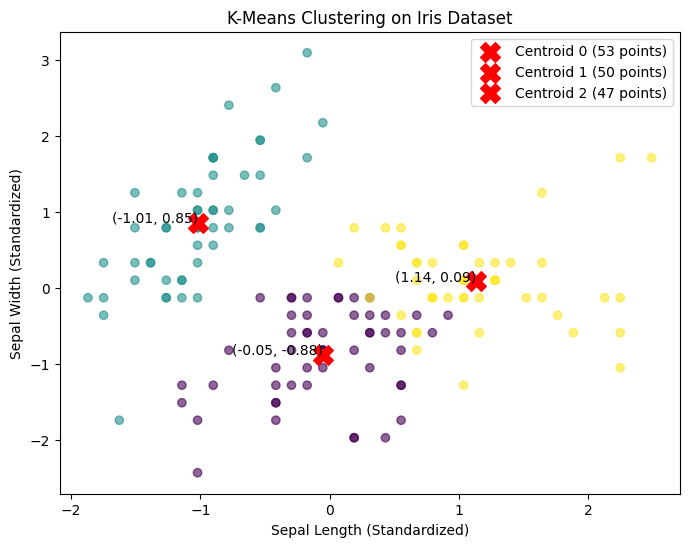

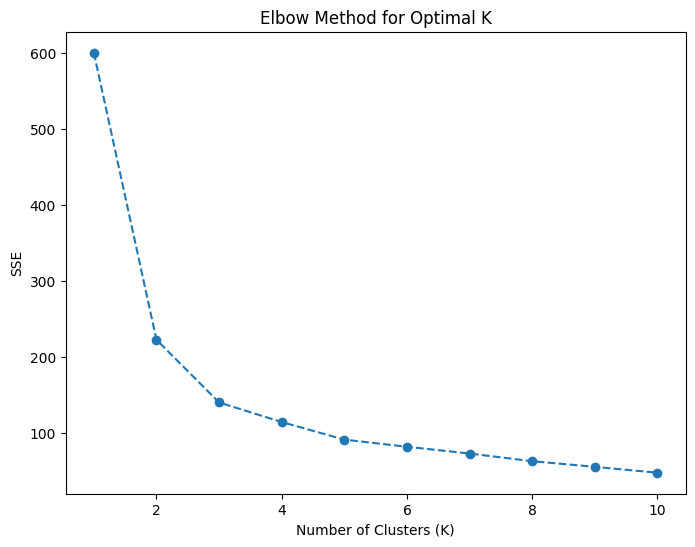

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

iris = datasets.load_iris()
X = iris.data
y_test = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

sns.pairplot(sns.load_dataset("iris"), hue="species")
plt.show()

k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(X_scaled)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

y_pred = labels

sse = kmeans.inertia_
print(f"SSE for K={k}: {sse}")

unique, counts = np.unique(labels, return_counts=True)
cluster_counts = dict(zip(unique, counts))

sse_per_centroid = np.zeros(k)
for i in range(k):
    cluster_points = X_scaled[np.where(labels == i)]
    sse_per_centroid[i] = np.sum((cluster_points - centroids[i]) ** 2)
    print(f"SSE for Centroid {i}: {sse_per_centroid[i]}")

print("y_test (True Labels):")
print(y_test)
print("y_pred (Predicted Labels):")
print(y_pred)

for i in range(k):
    cluster_indices = np.where(labels == i)[0]
    true_labels_in_cluster = y_test[cluster_indices]
    print(f"Centroid {i} has {len(cluster_indices)} points with true labels: {true_labels_in_cluster}")

plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', alpha=0.6)

for i, (cx, cy) in enumerate(centroids[:, :2]):
    plt.scatter(cx, cy, c='red', marker='X', s=200, label=f'Centroid {i} ({cluster_counts[i]} points)')
    plt.text(cx, cy, f'({cx:.2f}, {cy:.2f})', fontsize=10, ha='right', color='black')

plt.xlabel("Sepal Length (Standardized)")
plt.ylabel("Sepal Width (Standardized)")
plt.title("K-Means Clustering on Iris Dataset")
plt.legend()
plt.show()

sse_values = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    sse_values.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, sse_values, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("SSE")
plt.title("Elbow Method for Optimal K")
plt.show()


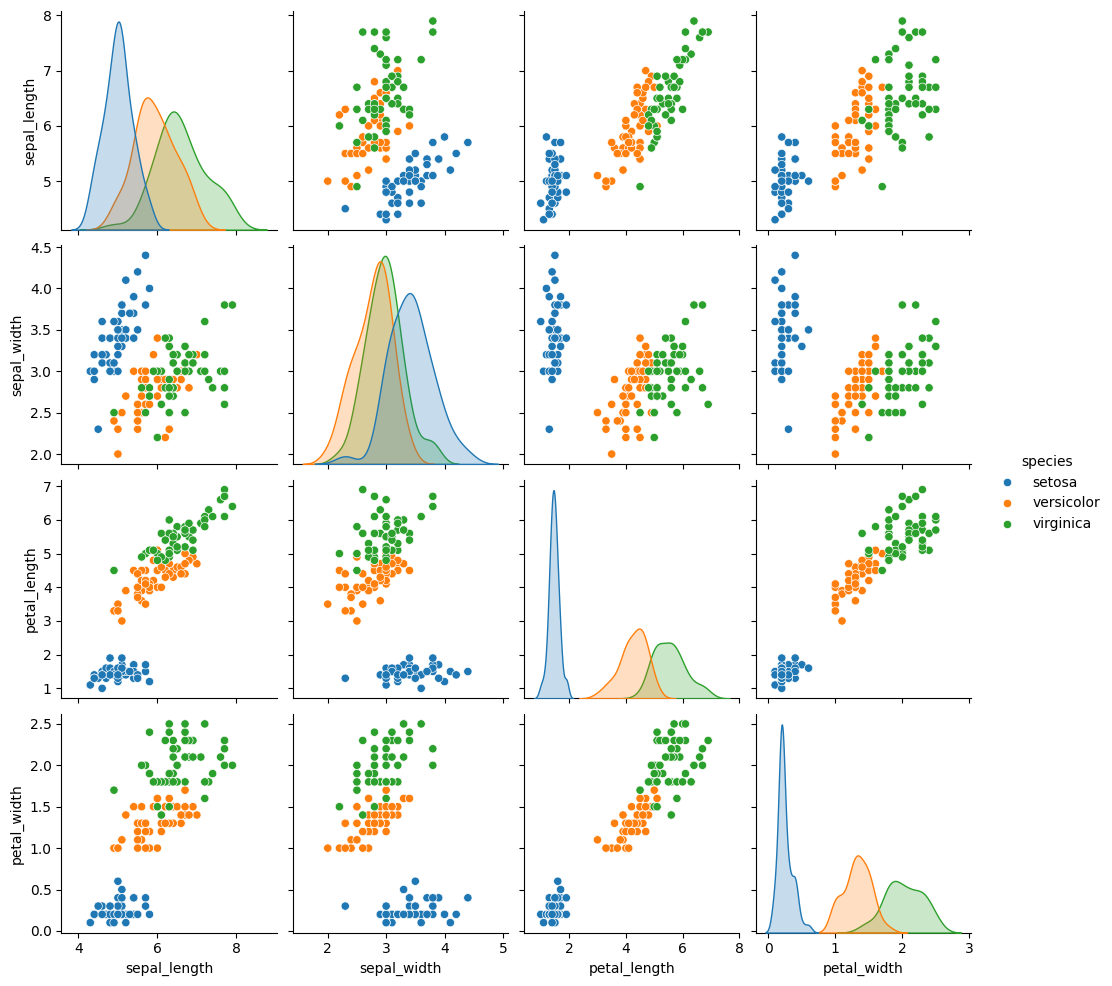

SSE for K=3: 139.82049635974974
SSE for Centroid 0: 44.38343410725925
Centroid 0: Avg Distance = 0.8573, Max Distance = 1.9719
SSE for Centroid 1: 47.668410508964406
Centroid 1: Avg Distance = 0.8137, Max Distance = 2.6706
SSE for Centroid 2: 47.76865174352616
Centroid 2: Avg Distance = 0.9129, Max Distance = 2.1735
y_test (True Labels):
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
y_pred (Predicted Labels):
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 0 2 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 2 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
Centroid 0 has 53 poi

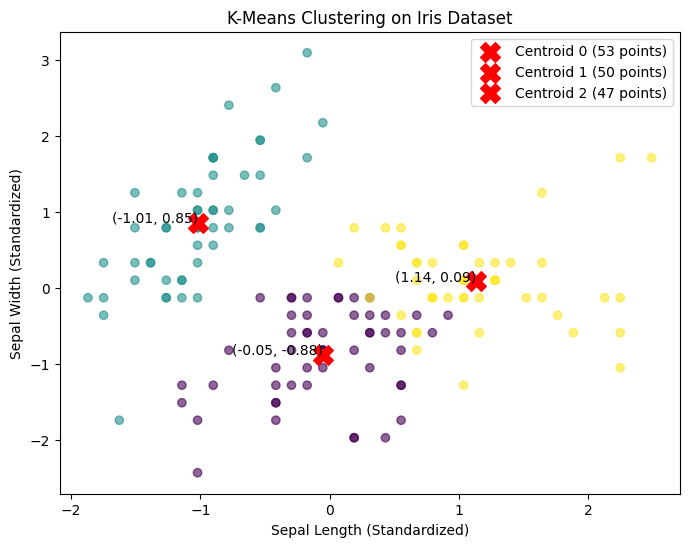

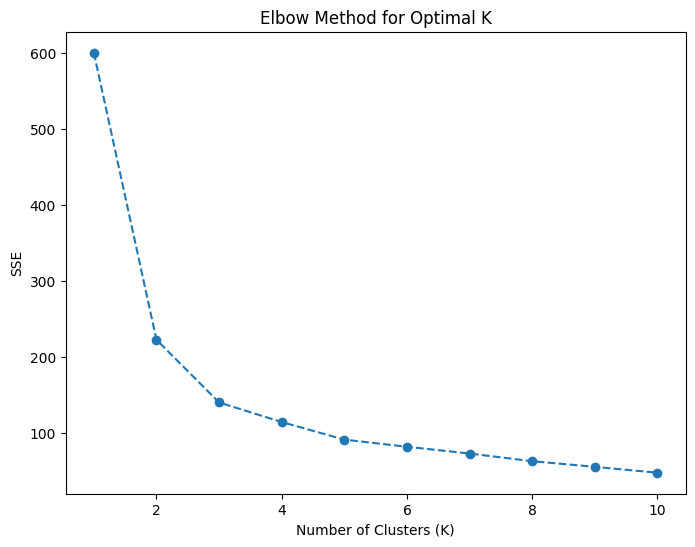

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

iris = datasets.load_iris()
X = iris.data
y_test = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

sns.pairplot(sns.load_dataset("iris"), hue="species")
plt.show()

k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(X_scaled)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

y_pred = labels

sse = kmeans.inertia_
print(f"SSE for K={k}: {sse}")

unique, counts = np.unique(labels, return_counts=True)
cluster_counts = dict(zip(unique, counts))

sse_per_centroid = np.zeros(k)
distances_per_centroid = []

for i in range(k):
    cluster_points = X_scaled[np.where(labels == i)]
    sse_per_centroid[i] = np.sum((cluster_points - centroids[i]) ** 2)
    distances = np.linalg.norm(cluster_points - centroids[i], axis=1)
    distances_per_centroid.append(distances)
    print(f"SSE for Centroid {i}: {sse_per_centroid[i]}")
    print(f"Centroid {i}: Avg Distance = {np.mean(distances):.4f}, Max Distance = {np.max(distances):.4f}")

print("y_test (True Labels):")
print(y_test)
print("y_pred (Predicted Labels):")
print(y_pred)

for i in range(k):
    cluster_indices = np.where(labels == i)[0]
    true_labels_in_cluster = y_test[cluster_indices]
    print(f"Centroid {i} has {len(cluster_indices)} points with true labels: {true_labels_in_cluster}")

plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', alpha=0.6)

for i, (cx, cy) in enumerate(centroids[:, :2]):
    plt.scatter(cx, cy, c='red', marker='X', s=200, label=f'Centroid {i} ({cluster_counts[i]} points)')
    plt.text(cx, cy, f'({cx:.2f}, {cy:.2f})', fontsize=10, ha='right', color='black')

plt.xlabel("Sepal Length (Standardized)")
plt.ylabel("Sepal Width (Standardized)")
plt.title("K-Means Clustering on Iris Dataset")
plt.legend()
plt.show()

sse_values = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    sse_values.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, sse_values, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("SSE")
plt.title("Elbow Method for Optimal K")
plt.show()

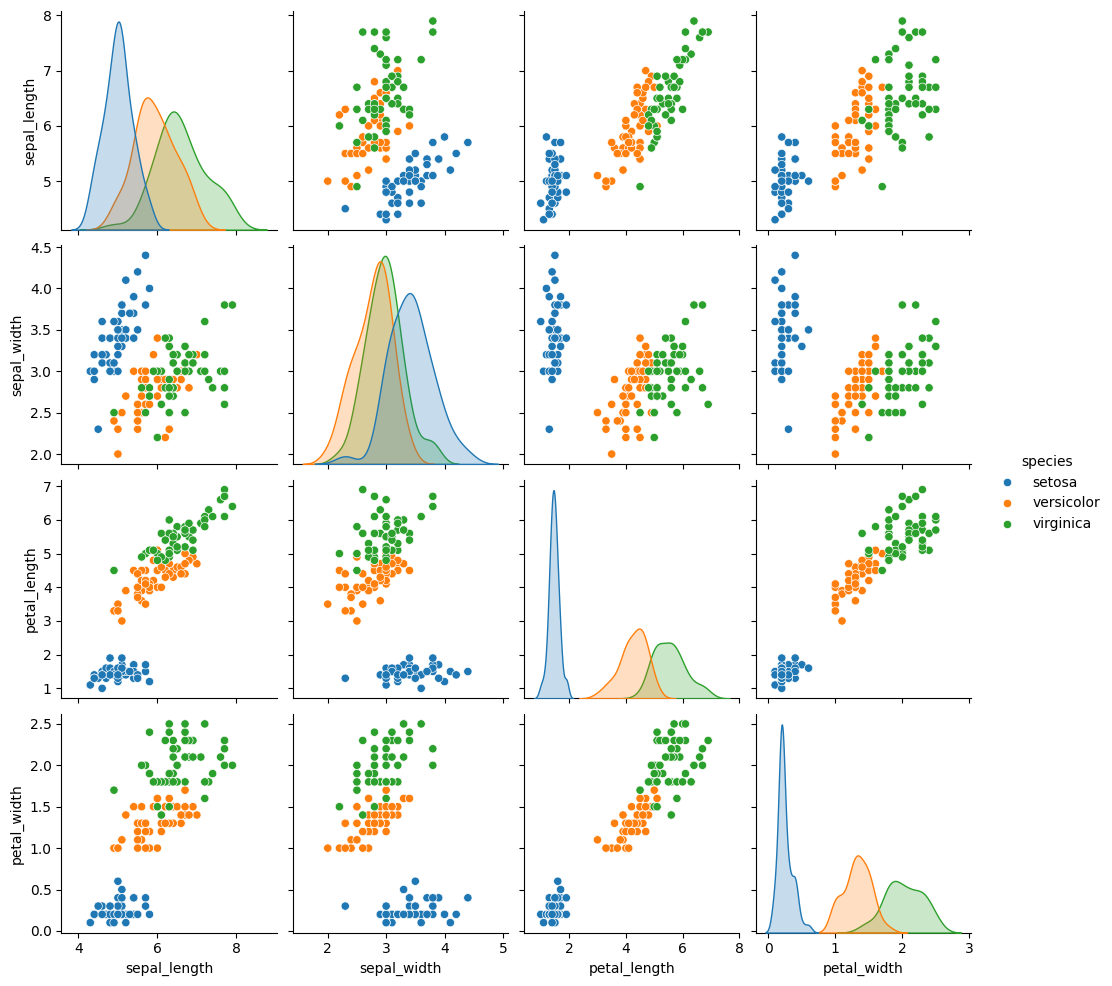

SSE for K=4: 114.09254690403094
SSE for Centroid 0: 47.76865174352616
Centroid 0: Avg Distance = 0.9129, Max Distance = 2.1735
SSE for Centroid 1: 44.38343410725925
Centroid 1: Avg Distance = 0.8573, Max Distance = 1.9719
SSE for Centroid 2: 13.853947969125336
Centroid 2: Avg Distance = 0.6214, Max Distance = 1.7658
SSE for Centroid 3: 8.086513084120153
Centroid 3: Avg Distance = 0.4872, Max Distance = 1.8880
y_test (True Labels):
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
y_pred (Predicted Labels):
[2 3 3 3 2 2 3 2 3 3 2 3 3 3 2 2 2 2 2 2 2 2 2 3 3 3 2 2 2 3 3 2 2 2 3 3 2
 2 3 2 2 3 3 2 2 3 2 3 2 3 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 

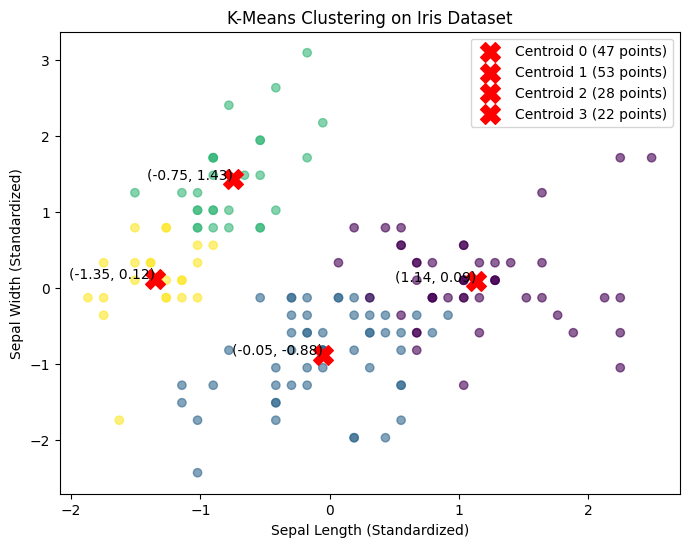

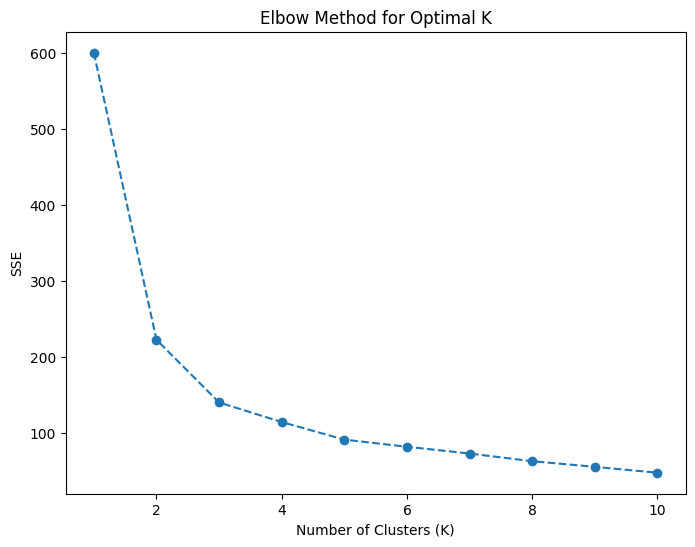

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

iris = datasets.load_iris()
X = iris.data
y_test = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

sns.pairplot(sns.load_dataset("iris"), hue="species")
plt.show()

k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(X_scaled)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

y_pred = labels

sse = kmeans.inertia_
print(f"SSE for K={k}: {sse}")

unique, counts = np.unique(labels, return_counts=True)
cluster_counts = dict(zip(unique, counts))

sse_per_centroid = np.zeros(k)
distances_per_centroid = []

for i in range(k):
    cluster_points = X_scaled[np.where(labels == i)]
    sse_per_centroid[i] = np.sum((cluster_points - centroids[i]) ** 2)
    distances = np.linalg.norm(cluster_points - centroids[i], axis=1)
    distances_per_centroid.append(distances)
    print(f"SSE for Centroid {i}: {sse_per_centroid[i]}")
    print(f"Centroid {i}: Avg Distance = {np.mean(distances):.4f}, Max Distance = {np.max(distances):.4f}")

print("y_test (True Labels):")
print(y_test)
print("y_pred (Predicted Labels):")
print(y_pred)

for i in range(k):
    cluster_indices = np.where(labels == i)[0]
    true_labels_in_cluster = y_test[cluster_indices]
    print(f"Centroid {i} has {len(cluster_indices)} points with true labels: {true_labels_in_cluster}")

plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', alpha=0.6)

for i, (cx, cy) in enumerate(centroids[:, :2]):
    plt.scatter(cx, cy, c='red', marker='X', s=200, label=f'Centroid {i} ({cluster_counts[i]} points)')
    plt.text(cx, cy, f'({cx:.2f}, {cy:.2f})', fontsize=10, ha='right', color='black')

plt.xlabel("Sepal Length (Standardized)")
plt.ylabel("Sepal Width (Standardized)")
plt.title("K-Means Clustering on Iris Dataset")
plt.legend()
plt.show()

sse_values = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    sse_values.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, sse_values, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("SSE")
plt.title("Elbow Method for Optimal K")
plt.show()

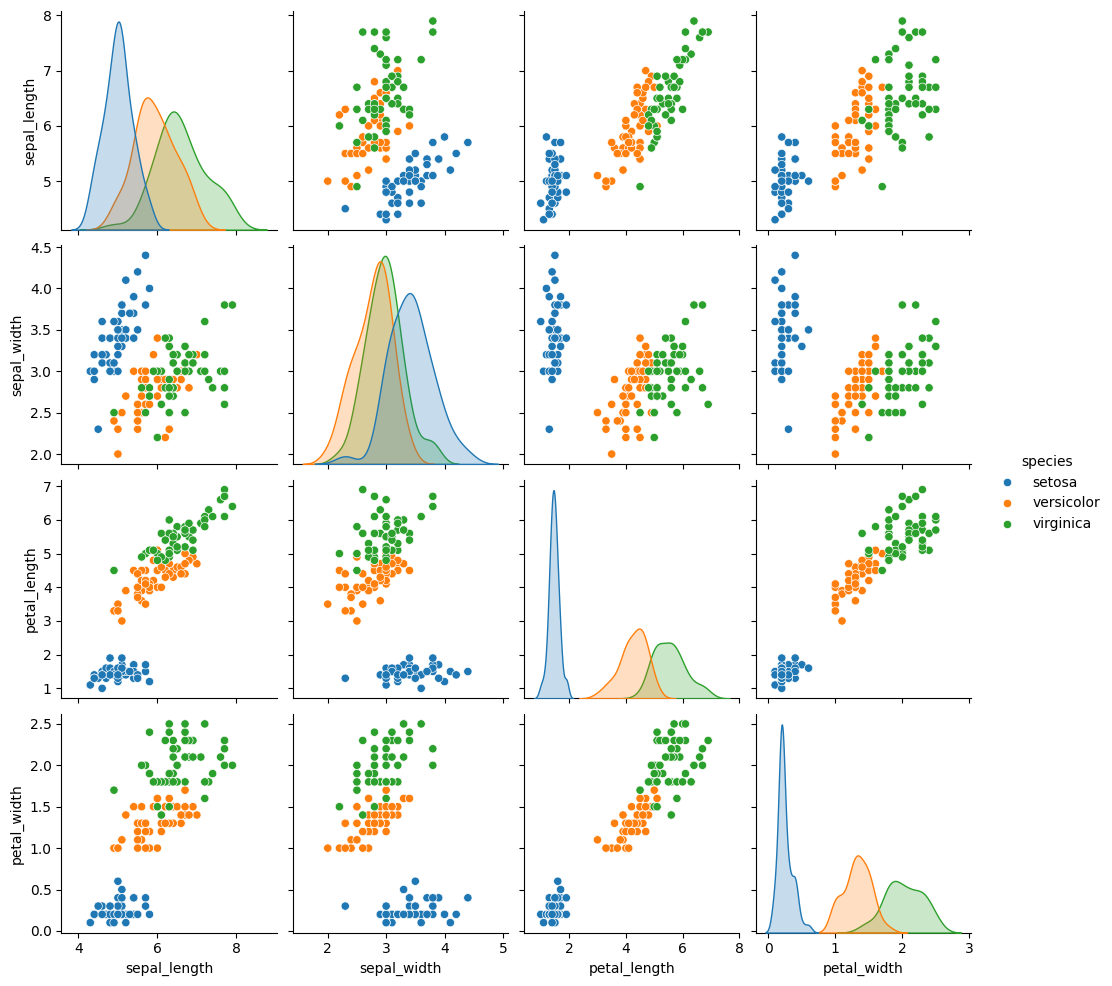

SSE for K=5: 90.92751382392049
SSE for Centroid 0: 13.853947969125336
Centroid 0: Avg Distance = 0.6214, Max Distance = 1.7658
SSE for Centroid 1: 28.51730073397943
Centroid 1: Avg Distance = 0.7318, Max Distance = 1.2626
SSE for Centroid 2: 15.840134049182604
Centroid 2: Avg Distance = 0.7253, Max Distance = 1.3910
SSE for Centroid 3: 24.629617987512997
Centroid 3: Avg Distance = 0.8569, Max Distance = 1.8726
SSE for Centroid 4: 8.086513084120153
Centroid 4: Avg Distance = 0.4872, Max Distance = 1.8880
y_test (True Labels):
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
y_pred (Predicted Labels):
[0 4 4 4 0 0 4 0 4 4 0 4 4 4 0 0 0 0 0 0 0 0 0 4 4 4 0 0 0 4 4 0 0 0 4 4 0
 0 4 0 0 4 4 0 0 4 0 4 0 4 1 1 1 2 1 2 1 2 1 2 2 1 2 1 2 1 1 

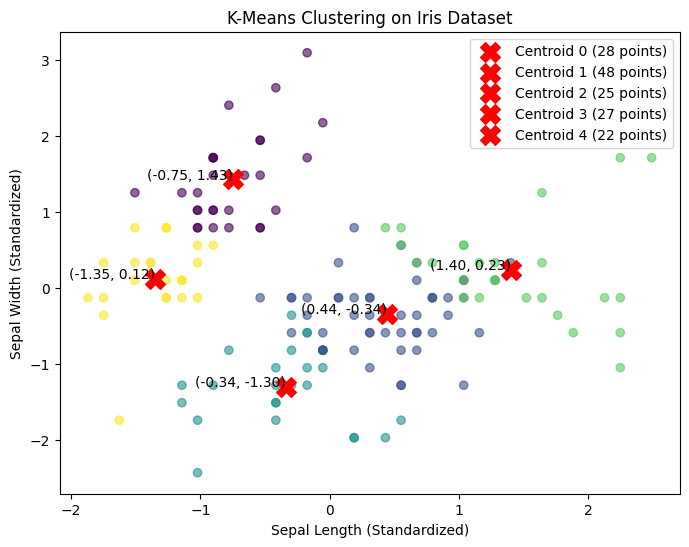

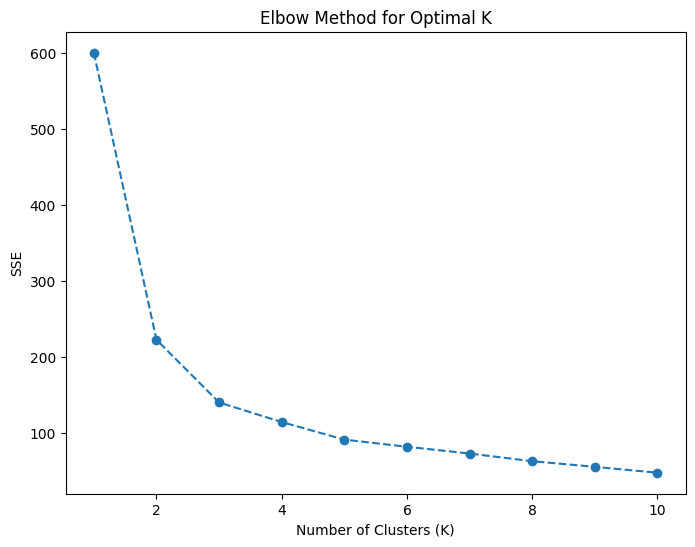

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

iris = datasets.load_iris()
X = iris.data
y_test = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

sns.pairplot(sns.load_dataset("iris"), hue="species")
plt.show()

k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(X_scaled)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

y_pred = labels

sse = kmeans.inertia_
print(f"SSE for K={k}: {sse}")

unique, counts = np.unique(labels, return_counts=True)
cluster_counts = dict(zip(unique, counts))

sse_per_centroid = np.zeros(k)
distances_per_centroid = []

for i in range(k):
    cluster_points = X_scaled[np.where(labels == i)]
    sse_per_centroid[i] = np.sum((cluster_points - centroids[i]) ** 2)
    distances = np.linalg.norm(cluster_points - centroids[i], axis=1)
    distances_per_centroid.append(distances)
    print(f"SSE for Centroid {i}: {sse_per_centroid[i]}")
    print(f"Centroid {i}: Avg Distance = {np.mean(distances):.4f}, Max Distance = {np.max(distances):.4f}")

print("y_test (True Labels):")
print(y_test)
print("y_pred (Predicted Labels):")
print(y_pred)

for i in range(k):
    cluster_indices = np.where(labels == i)[0]
    true_labels_in_cluster = y_test[cluster_indices]
    print(f"Centroid {i} has {len(cluster_indices)} points with true labels: {true_labels_in_cluster}")

plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', alpha=0.6)

for i, (cx, cy) in enumerate(centroids[:, :2]):
    plt.scatter(cx, cy, c='red', marker='X', s=200, label=f'Centroid {i} ({cluster_counts[i]} points)')
    plt.text(cx, cy, f'({cx:.2f}, {cy:.2f})', fontsize=10, ha='right', color='black')

plt.xlabel("Sepal Length (Standardized)")
plt.ylabel("Sepal Width (Standardized)")
plt.title("K-Means Clustering on Iris Dataset")
plt.legend()
plt.show()

sse_values = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    sse_values.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, sse_values, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("SSE")
plt.title("Elbow Method for Optimal K")
plt.show()

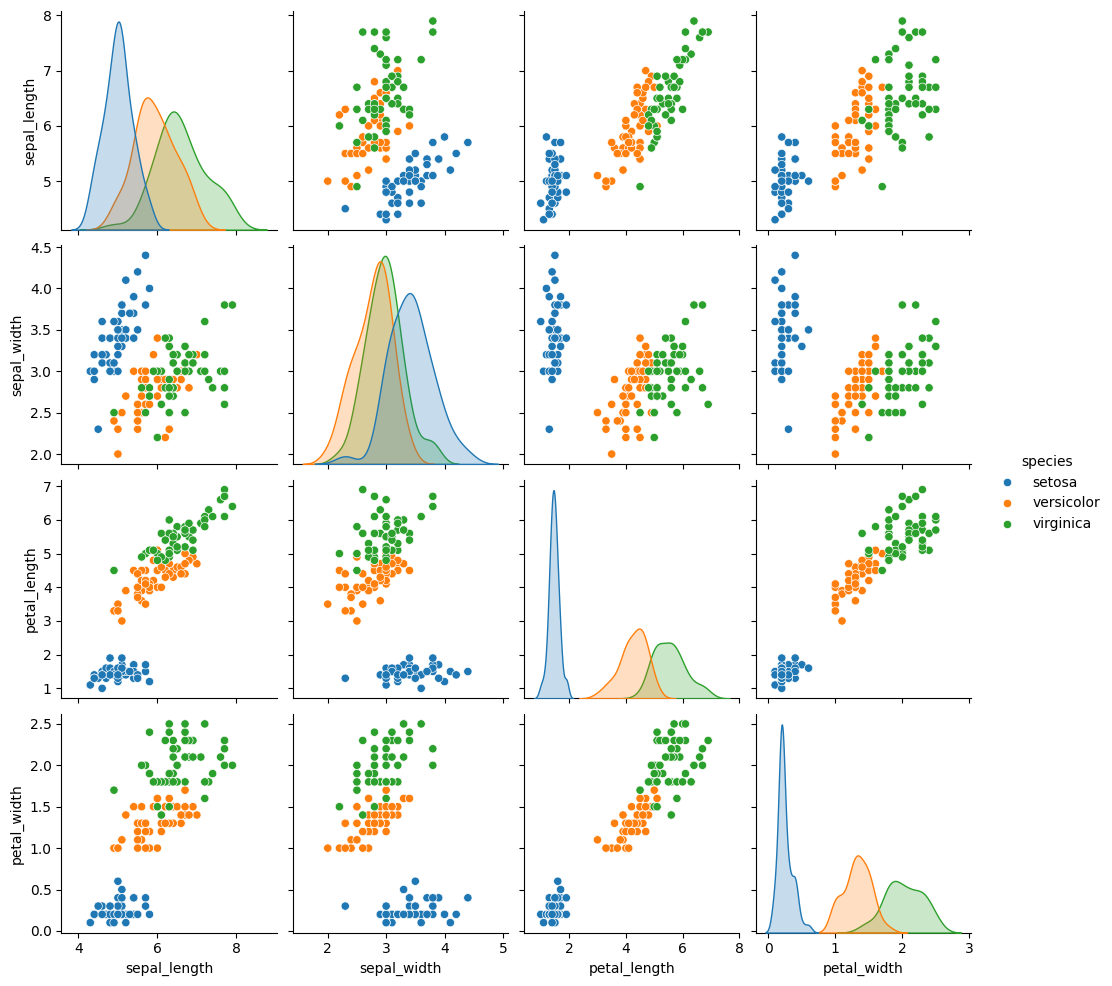

SSE for K=15: 32.919137630053925
SSE for Centroid 0: 0.6732871235246691
Centroid 0: Avg Distance = 0.3406, Max Distance = 0.5329
SSE for Centroid 1: 3.06995047307393
Centroid 1: Avg Distance = 0.3577, Max Distance = 0.6955
SSE for Centroid 2: 3.1303313700303637
Centroid 2: Avg Distance = 0.4725, Max Distance = 0.8075
SSE for Centroid 3: 4.315558250572807
Centroid 3: Avg Distance = 0.4935, Max Distance = 1.0810
SSE for Centroid 4: 3.1119306055103664
Centroid 4: Avg Distance = 0.5497, Max Distance = 0.9756
SSE for Centroid 5: 2.8557252043142483
Centroid 5: Avg Distance = 0.6705, Max Distance = 1.2745
SSE for Centroid 6: 0.873668392658171
Centroid 6: Avg Distance = 0.4238, Max Distance = 0.5980
SSE for Centroid 7: 1.3082070545342592
Centroid 7: Avg Distance = 0.3466, Max Distance = 0.5658
SSE for Centroid 8: 0.9667515286355519
Centroid 8: Avg Distance = 0.3193, Max Distance = 0.5038
SSE for Centroid 9: 0.800655723733238
Centroid 9: Avg Distance = 0.4857, Max Distance = 0.6938
SSE for Cent

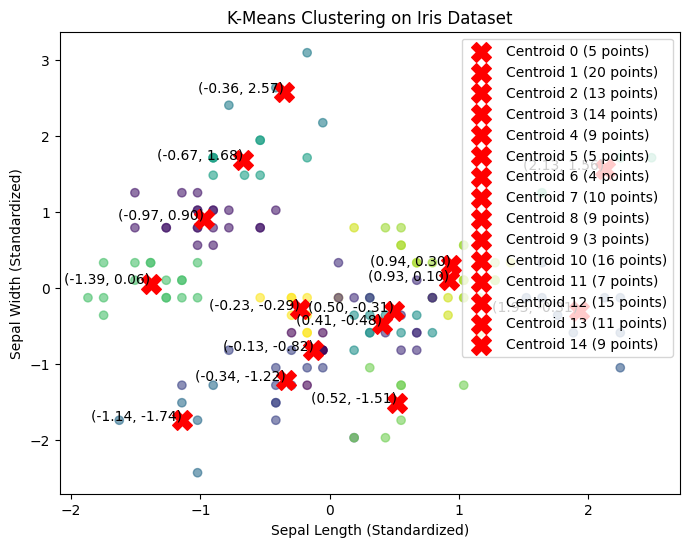

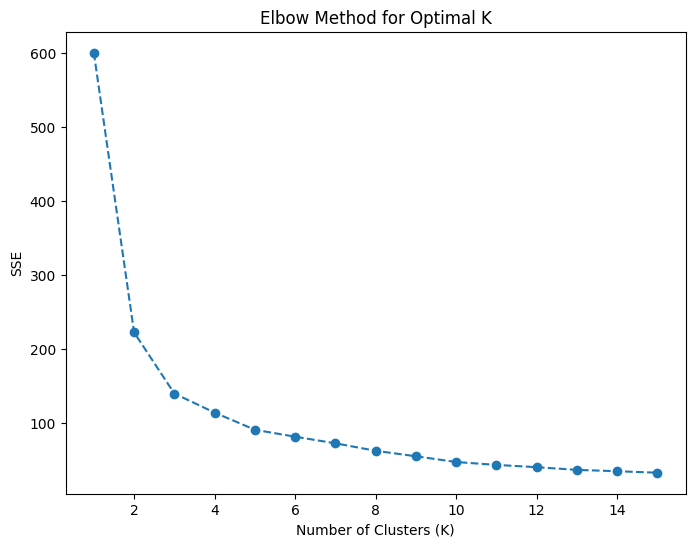

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

iris = datasets.load_iris()
X = iris.data
y_test = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

sns.pairplot(sns.load_dataset("iris"), hue="species")
plt.show()

k = 15
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(X_scaled)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

y_pred = labels

sse = kmeans.inertia_
print(f"SSE for K={k}: {sse}")

unique, counts = np.unique(labels, return_counts=True)
cluster_counts = dict(zip(unique, counts))

sse_per_centroid = np.zeros(k)
distances_per_centroid = []

for i in range(k):
    cluster_points = X_scaled[np.where(labels == i)]
    sse_per_centroid[i] = np.sum((cluster_points - centroids[i]) ** 2)
    distances = np.linalg.norm(cluster_points - centroids[i], axis=1)
    distances_per_centroid.append(distances)
    print(f"SSE for Centroid {i}: {sse_per_centroid[i]}")
    print(f"Centroid {i}: Avg Distance = {np.mean(distances):.4f}, Max Distance = {np.max(distances):.4f}")

print("y_test (True Labels):")
print(y_test)
print("y_pred (Predicted Labels):")
print(y_pred)

for i in range(k):
    cluster_indices = np.where(labels == i)[0]
    true_labels_in_cluster = y_test[cluster_indices]
    print(f"Centroid {i} has {len(cluster_indices)} points with true labels: {true_labels_in_cluster}")

plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', alpha=0.6)

for i, (cx, cy) in enumerate(centroids[:, :2]):
    plt.scatter(cx, cy, c='red', marker='X', s=200, label=f'Centroid {i} ({cluster_counts[i]} points)')
    plt.text(cx, cy, f'({cx:.2f}, {cy:.2f})', fontsize=10, ha='right', color='black')

plt.xlabel("Sepal Length (Standardized)")
plt.ylabel("Sepal Width (Standardized)")
plt.title("K-Means Clustering on Iris Dataset")
plt.legend()
plt.show()

sse_values = []
k_range = range(1, 16)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    sse_values.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, sse_values, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("SSE")
plt.title("Elbow Method for Optimal K")
plt.show()